# Generation de fausses données représentatives

In [1]:
# hide
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

In [3]:
# poetry run python -m ipykernel install --name sdv --user

In [4]:
from sdv import SDV

sdv = SDV()

In [5]:
df = pd.read_hdf(
    "/mnt/data-out/leximpact/erfs-fpr/base_2021/erfs_final_ind_2018_aged_to_2021_N_3.h5"
)

In [6]:
df.head(3)
df.tail(3)
df.columns

activite   age  categorie_salarie  contrat_de_travail date_naissance  \
0       4.0  81.0                7.0                 6.0     1936-06-06   
1       3.0  69.0                7.0                 6.0     1948-03-21   
2       3.0  68.0                7.0                 6.0     1949-03-22   

   effectif_entreprise  heures_remunerees_volume  idfam  idfoy  idmen  ...  \
0                  0.0                       0.0      0    0.0      0  ...   
1                  0.0                       0.0      1    1.0      1  ...   
2                  0.0                       0.0      1    1.0      1  ...   

   csg_imposable_salaire  csg_deductible_salaire  csg_imposable_retraite  \
0                    0.0                     0.0                0.000000   
1                    0.0                     0.0             -995.311584   
2                    0.0                     0.0                0.000000   

   csg_deductible_retraite  csg_revenus_capital  crds_retraite  crds_chomage  \
0                 0.000000                 -0.0       0.000000           0.0   
1             -2446.807861                 -0.0    -207.356628           0.0   
2                 0.000000                  0.0       0.000000           0.0   

   crds_salaire    irpp  crds_revenus_capital  
0           0.0     0.0                  -0.0  
1           0.0 -1109.0                  -0.0  
2           0.0     0.0                   0.0  

[3 rows x 50 columns]

activite  age  categorie_salarie  contrat_de_travail date_naissance  \
340017       NaN  NaN                NaN                 NaN            NaT   
340018       NaN  NaN                NaN                 NaN            NaT   
340019       NaN  NaN                NaN                 NaN            NaT   

        effectif_entreprise  heures_remunerees_volume   idfam     idfoy  \
340017                  NaN                       NaN  174415  174415.0   
340018                  NaN                       NaN  174396  174396.0   
340019                  NaN                       NaN  174391  174391.0   

         idmen  ...  csg_imposable_salaire  csg_deductible_salaire  \
340017  174415  ...                    0.0                     0.0   
340018  174396  ...                    0.0                     0.0   
340019  174391  ...                    0.0                     0.0   

        csg_imposable_retraite  csg_deductible_retraite  csg_revenus_capital  \
340017                     0.0                      0.0         -3696982.000   
340018                     0.0                      0.0         -1930778.375   
340019                     0.0                      0.0         -9975051.000   

        crds_retraite  crds_chomage  crds_salaire  irpp  crds_revenus_capital  
340017            0.0           0.0           0.0   NaN        -200922.937500  
340018            0.0           0.0           0.0   NaN        -104933.609375  
340019            0.0           0.0           0.0   NaN        -542122.375000  

[3 rows x 50 columns]

Index(['activite', 'age', 'categorie_salarie', 'contrat_de_travail',
       'date_naissance', 'effectif_entreprise', 'heures_remunerees_volume',
       'idfam', 'idfoy', 'idmen', 'noindiv', 'quifam', 'quifoy', 'quimen',
       'statut_marital', 'idmen_original', 'idfoy_original', 'idfam_original',
       'idmen_x', 'wprm', 'zone_apl', 'fake_id', 'quimenof', 'quifoyof',
       'quifamof', 'chomage_brut', 'pensions_alimentaires_percues', 'rag',
       'ric', 'rnc', 'salaire_de_base', 'f4ba', 'retraite_brute', 'rfr',
       'revenus_capitaux_prelevement_bareme',
       'revenus_capitaux_prelevement_liberatoire',
       'revenus_capitaux_prelevement_forfaitaire_unique_ir',
       'salaire_imposable', 'assiette_csg_abattue', 'assiette_csg_non_abattue',
       'csg_imposable_salaire', 'csg_deductible_salaire',
       'csg_imposable_retraite', 'csg_deductible_retraite',
       'csg_revenus_capital', 'crds_retraite', 'crds_chomage', 'crds_salaire',
       'irpp', 'crds_revenus_capital'],
     

In [ ]:
%%time
erfs = df  # .sample(1000)
# from sdv.tabular import CopulaGAN
# model = CopulaGAN(primary_key='idfam')
# model.fit(erfs)
# model.save('CopulaGAN.pkl')

from sdv.tabular import GaussianCopula

model = GaussianCopula()  # TODO: Creer une primary_key combinée
model.fit(erfs)
model.save("GaussianCopula.pkl")

/home/jupyter-benoit/.cache/pypoetry/virtualenvs/test-sdv-BBkfXkIw-py3.8/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/jupyter-benoit/.cache/pypoetry/virtualenvs/test-sdv-BBkfXkIw-py3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/jupyter-benoit/.cache/pypoetry/virtualenvs/test-sdv-BBkfXkIw-py3.8/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/jupyter-benoit/.cache/pypoetry/virtualenvs/test-sdv-BBkfXkIw-py3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, Ru

Temps de traitement de CopulaGAN pour l'erfs complet : => Ne s'est jamais terminé, même après 24h, à essayer sur GPU !
Temps de traitement de GaussianCopula pour 1 000 sample : 21 secondes.
Temps de traitement de GaussianCopula pour l'erfs complet : 15 minutes environs.

In [11]:
new_data = model.sample(1000)
new_data

activite   age  categorie_salarie  contrat_de_travail date_naissance  \
0         2.0  70.0                1.0                 4.0     1944-12-08   
1         1.0  48.0                6.0                 2.0     1973-08-19   
2         1.0  59.0                4.0                 2.0     1960-01-29   
3         1.0   1.0                7.0                 6.0     2016-06-14   
4         3.0  64.0                7.0                 3.0     1954-01-07   
..        ...   ...                ...                 ...            ...   
995       3.0  57.0                5.0                 6.0     1953-09-30   
996       0.0  82.0                0.0                 0.0     1948-05-07   
997       4.0  75.0                7.0                 6.0     1939-03-20   
998       0.0  38.0                2.0                 1.0     1982-03-11   
999       3.0  62.0                7.0                 6.0     1953-06-02   

     effectif_entreprise  heures_remunerees_volume   idfam     idfoy   idmen  \
0                   40.0              3.084783e-21  155337  155327.0  152080   
1                  162.0              4.555023e-23  157401  157402.0  154272   
2                    0.0              3.643854e-22   48332   48287.0   45875   
3                    0.0              4.352914e-22   64383   64429.0   58634   
4                   22.0              0.000000e+00   84530   84579.0   82282   
..                   ...                       ...     ...       ...     ...   
995                 30.0              7.110049e-22  151576  151569.0  153468   
996                252.0              6.789603e-22  114018  114035.0  111976   
997                 64.0              6.688810e-22   10971   10986.0   12833   
998                280.0              2.220490e-21  130523  130541.0  127299   
999                  0.0              0.000000e+00  103213  103247.0   93661   

     ...  csg_imposable_salaire  csg_deductible_salaire  \
0    ...               0.000000                0.000000   
1    ...            -321.031067             -909.096680   
2    ...             -76.313797             -215.404999   
3    ...             -68.060654             -192.563843   
4    ...            -488.318146            -1383.729370   
..   ...                    ...                     ...   
995  ...               0.000000                0.000000   
996  ...           -1004.402710            -2845.975098   
997  ...               0.000000                0.000000   
998  ...            -282.572693             -801.085876   
999  ...             -61.663120             -174.144272   

     csg_imposable_retraite  csg_deductible_retraite  csg_revenus_capital  \
0                  0.000000              -194.155884        -69474.406250   
1                  0.000000                 0.000000            -0.000000   
2              -3252.742920             -1343.256104            -0.000000   
3                  0.000000                 0.000000        -86428.664062   
4                  0.000000                 0.000000            -0.000000   
..                      ...                      ...                  ...   
995             -792.757690              -818.084351       -116546.445312   
996            -2227.669678              -992.968567            -0.000000   
997            -1420.085449              -587.062988        -62709.687500   
998                0.000000                 0.000000            -0.000000   
999               -3.406809              -261.481903       -154896.015625   

     crds_retraite  crds_chomage  crds_salaire         irpp  \
0         0.000000   -664.282227      0.000000 -7859.181641   
1        -5.100753   -370.002686    -66.915161  -759.511536   
2      -656.303589      0.000000    -15.943114 -3261.122803   
3         0.000000      0.000000    -14.209024 -1782.608398   
4       -19.092371      0.000000   -101.743042     0.000000   
..             ...           ...           ...          ...   
995    -443.826813   -199.372040      0.0000

In [12]:
new_data.to_csv("/mnt/data-out/leximpact/erfs-fpr/sdv.csv")

<AxesSubplot:>

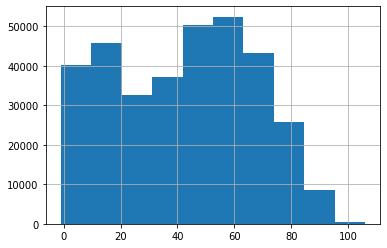

In [13]:
df.age.hist()

<AxesSubplot:>

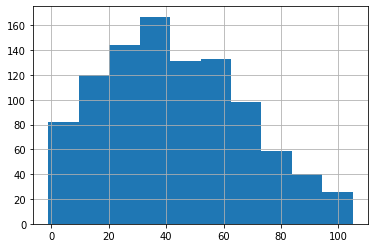

In [14]:
new_data.age.hist()

In [15]:
df.query("salaire_imposable < 100000").salaire_imposable.hist()

<AxesSubplot:>

In [16]:
new_data.salaire_imposable.hist()

<AxesSubplot:>

In [17]:
new_data.wprm.sum()

225762.8304244188

In [22]:
new_data.query("0< age < 18").salaire_de_base.sum()
new_data.query("18 <= age < 70").salaire_de_base.sum()
new_data.query("age > 70").salaire_de_base.sum()

1972744.6819097803

9871078.184177244

2871109.927143179

In [27]:
new_data.plot.scatter(x="age", y="salaire_de_base", alpha=0.1)

<AxesSubplot:xlabel='age', ylabel='salaire_de_base'>

<AxesSubplot:xlabel='age', ylabel='salaire_de_base'>

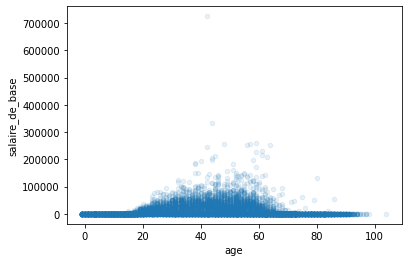

In [36]:
erfs.sample(10_000).plot.scatter(x="age", y="salaire_de_base", alpha=0.1)

On constate que la distribution du salaire en fonction de l'age n'est pas du tout la même ! SDV affecte des revenus à tous les ages !

In [28]:
new_data.plot.scatter(x="age", y="chomage_brut", alpha=0.1)

<AxesSubplot:xlabel='age', ylabel='chomage_brut'>

<AxesSubplot:xlabel='age', ylabel='retraite_brute'>

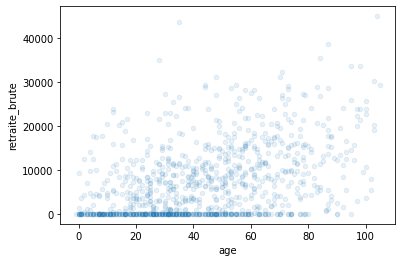

In [29]:
new_data.plot.scatter(x="age", y="retraite_brute", alpha=0.1)